<a href="https://colab.research.google.com/github/arundhatiroy99/1stop-Industrial-training-with-IIT-Bhubaneswar/blob/main/No__of__orders_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#No of orders Prediction
import pandas as pd
df = pd.read_csv('Final.csv')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [ ]:
df.describe()


,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,5.129400e+04,51294.000000,51294.000000,5.129400e+04,51294.000000,5.129400e+04,5.129400e+04,20011.000000,5.129400e+04
mean,8.762379e+08,3306.439155,2998.809393,2.022012e+07,121881.582212,8.763046e+08,2.022015e+07,77.135276,7.068607e+08
std,7.101966e+07,694.510118,891.564997,7.007748e+00,49035.412054,7.112216e+07,4.024047e+02,14.693440,5.995349e+08
min,7.534528e+08,2100.000000,59.000000,2.022010e+07,10.000000,7.534616e+08,2.021011e+07,52.000000,1.200000e+01
25%,8.143118e+08,2706.000000,3130.000000,2.022011e+07,83138.000000,8.148703e+08,2.022012e+07,64.000000,1.231175e+07
50%,8.764419e+08,3304.000000,3220.000000,2.022012e+07,121856.000000,8.757411e+08,2.022012e+07,64.000000,1.210132e+09
75%,9.375502e+08,3909.000000,3320.000000,2.022012e+07,155845.750000,9.383484e+08,2.022020e+07,93.000000,1.230018e+09
max,9.989970e+08,4510.000000,4200.000000,2.022013e+07,235248.000000,9.990033e+08,2.028010e+07,93.000000,1.230025e+09


In [ ]:
df.shape


(51294, 16)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51294 entries, 0 to 51293
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUSTOMER_ORDER_ID        51294 non-null  int64  
 1   SALES_ORG                51294 non-null  int64  
 2   DISTRIBUTION_CHANNEL     51294 non-null  object 
 3   DIVISION                 51294 non-null  object 
 4   RELEASED_CREDIT_VALUE    51294 non-null  object 
 5   PURCHASE_ORDER_TYPE      48512 non-null  object 
 6   COMPANY_CODE             51294 non-null  int64  
 7   ORDER_CREATION_DATE      51294 non-null  int64  
 8   ORDER_CREATION_TIME      51294 non-null  int64  
 9   CREDIT_CONTROL_AREA      51294 non-null  object 
 10  SOLD_TO_PARTY            51294 non-null  int64  
 11  ORDER_AMOUNT             51294 non-null  object 
 12  REQUESTED_DELIVERY_DATE  51294 non-null  int64  
 13  ORDER_CURRENCY           51294 non-null  object 
 14  CREDIT_STATUS         

In [ ]:
df.isnull().sum()


CUSTOMER_ORDER_ID              0
SALES_ORG                      0
DISTRIBUTION_CHANNEL           0
DIVISION                       0
RELEASED_CREDIT_VALUE          0
PURCHASE_ORDER_TYPE         2782
COMPANY_CODE                   0
ORDER_CREATION_DATE            0
ORDER_CREATION_TIME            0
CREDIT_CONTROL_AREA            0
SOLD_TO_PARTY                  0
ORDER_AMOUNT                   0
REQUESTED_DELIVERY_DATE        0
ORDER_CURRENCY                 0
CREDIT_STATUS              31283
CUSTOMER_NUMBER                0
dtype: int64

In [ ]:
df.fillna('NaN', inplace=True)


In [ ]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])


In [ ]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'])


In [ ]:
df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0]


53

In [ ]:
if df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0] == 0:
    print('No order creation date is after requested delivery date')
else:
    print('There are order creation date after requested delivery date')


There are order creation date after requested delivery date


In [ ]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]
df.shape

(51241, 16)

In [ ]:
# oder amount has - in it
df[df['ORDER_AMOUNT'].str.contains('-')].shape[0]

6

In [ ]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')


In [ ]:
df[df['ORDER_AMOUNT'].str.contains(',')].shape[0]


51039

In [ ]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')


In [ ]:
df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']].shape[0]


4916

In [ ]:
df['ORDER_CURRENCY'].value_counts()


ORDER_CURRENCY
EUR    40534
GBP     5002
PLN     1691
AED     1678
RON      745
CHF      729
CZK      386
USD      260
HU1      202
BHD        7
SAR        3
KWD        2
QAR        2
Name: count, dtype: int64

In [ ]:
def convert_currency(amount, currency):
    if currency == 'USD':
        return amount
    else:
        url = 'https://www.google.com/search?q={} +{} +to +usd '.format(amount, currency)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        result = soup.find('div', attrs={'class':'BNeawe iBp4i AP7Wnd'}).text
        result = result.split(' ')[0]
        return result


In [ ]:
df['ORDER_CURRENCY'] = df['ORDER_CURRENCY'].str.replace('HU1', 'HUI')


In [ ]:
symbols = [x for x in df['ORDER_CURRENCY'].unique()]

dic = {}
for symbol in symbols:
    try:
        dic[symbol] = convert_currency('1', symbol)
    except:
        print(symbol)

EUR
AED
CHF
CZK
GBP
RON
PLN
HUI
SAR
BHD
KWD
QAR


In [ ]:
df['amount_in_usd'] = df.apply(lambda x: float(x['ORDER_AMOUNT']) * float(dic.get(x['ORDER_CURRENCY'], 0)), axis=1)

In [ ]:
df['amount_in_usd'] = df.apply(lambda x: float(x['ORDER_AMOUNT']) * float(dic.get(x['ORDER_CURRENCY'], 0)), axis=1)

# Handle rows where the currency is not present in the dictionary
df.loc[df['ORDER_CURRENCY'].isin(dic.keys()) == False, 'amount_in_usd'] = 0

In [ ]:
df[df['amount_in_usd'] == '0'].shape[0]


0

In [ ]:
df['uniue_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']


In [ ]:
df.to_csv('../data/FinalNew.csv', index=False)

OSError: Cannot save file into a non-existent directory: '../data'

In [ ]:
!mkdir ../data

In [ ]:
df.to_csv('../data/FinalNew.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/FinalNew.csv')


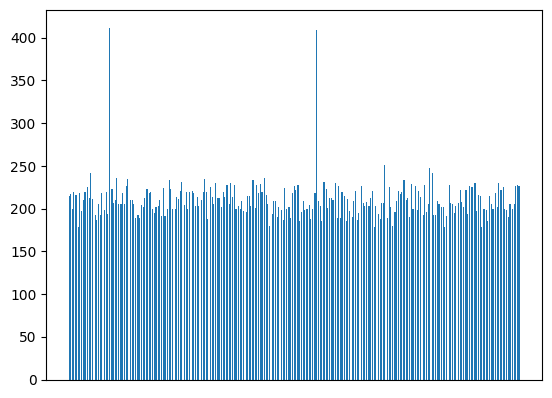

In [ ]:
plt.hist(df['DISTRIBUTION_CHANNEL'], bins=400)
plt.xticks([])
plt.show()

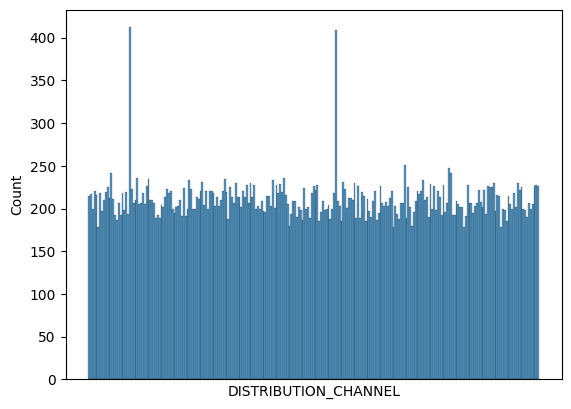

In [ ]:
sns.histplot(df['DISTRIBUTION_CHANNEL'], bins=400)
plt.xticks([])
plt.show()

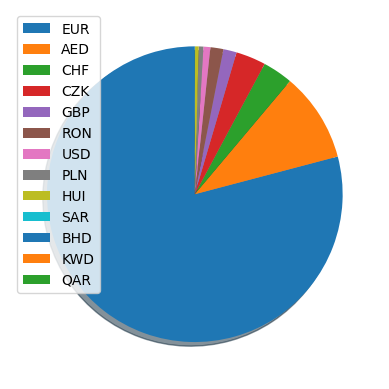

In [ ]:
plt.pie(df['ORDER_CURRENCY'].value_counts(), shadow=True, startangle=90)
plt.legend(df['ORDER_CURRENCY'].unique(), loc='upper left')
plt.show()

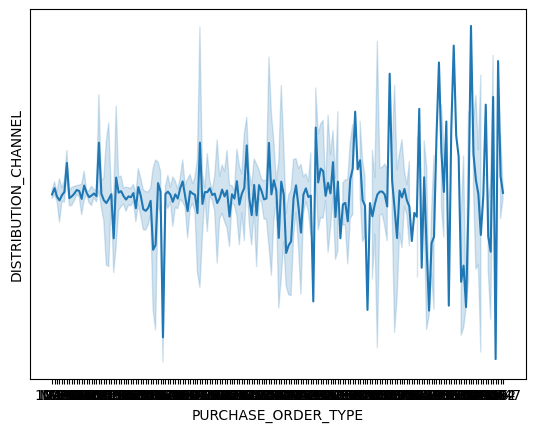

In [ ]:
sns.lineplot(x=df['PURCHASE_ORDER_TYPE'], y=df['DISTRIBUTION_CHANNEL'], data=df)
plt.yticks([])
plt.show()

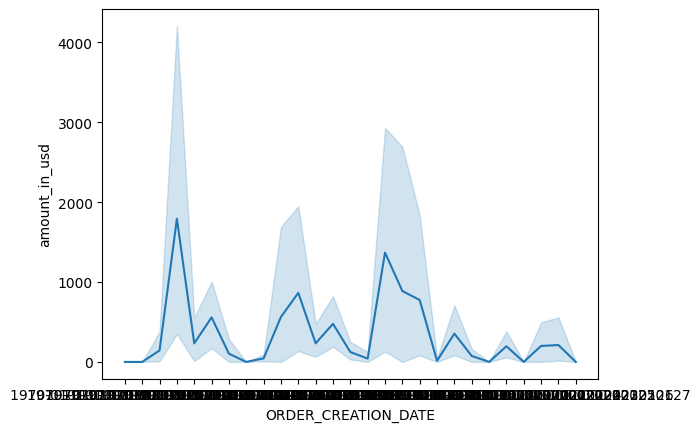

In [ ]:
sns.lineplot(x=df['ORDER_CREATION_DATE'], y=df['amount_in_usd'], data=df)
plt.show()

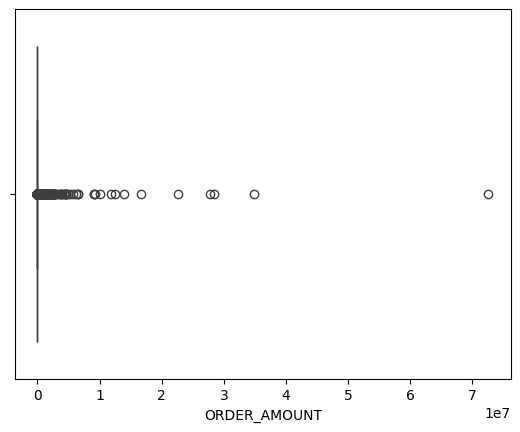

In [ ]:
sns.boxplot(x=df['ORDER_AMOUNT'], data=df)
plt.show()

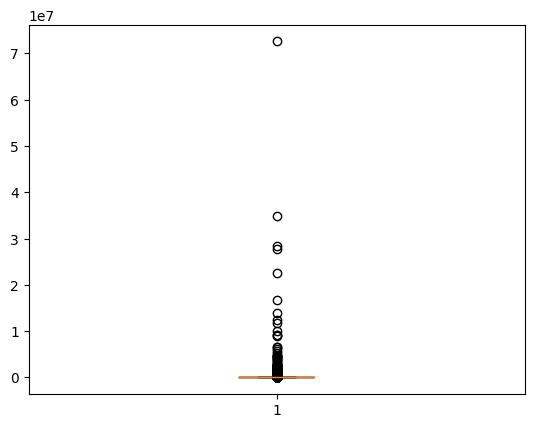

In [ ]:
plt.boxplot(df['ORDER_AMOUNT'])
plt.show()

In [ ]:
df = df.sort_values(by=['ORDER_AMOUNT'], ascending=False)


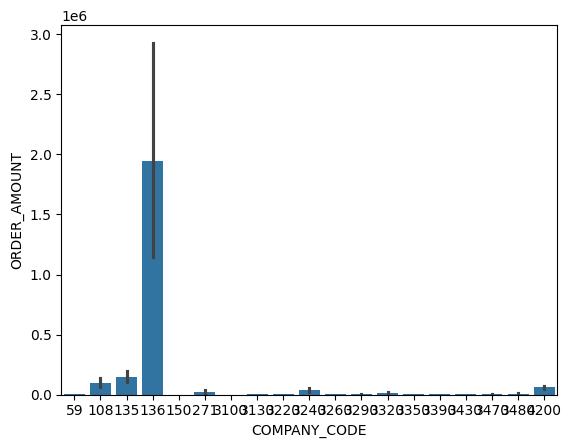

In [ ]:
sns.barplot(x=df['COMPANY_CODE'], y=df['ORDER_AMOUNT'], data=df)
plt.show()

In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
df = pd.read_csv('../data/FinalNew.csv')


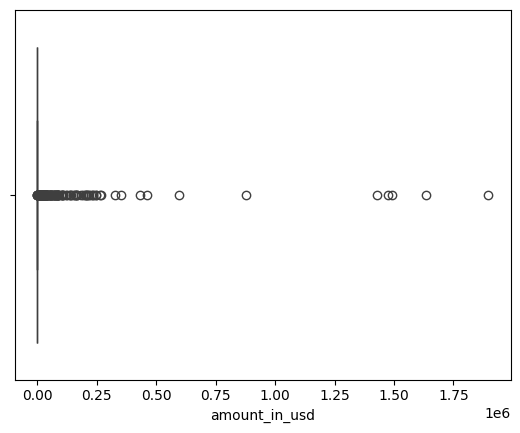

In [ ]:
sns.boxplot(x=df['amount_in_usd'])
median = df['amount_in_usd'].median()
df['amount_in_usd'] = df['amount_in_usd'].mask(df['amount_in_usd'] > 2000000, median)

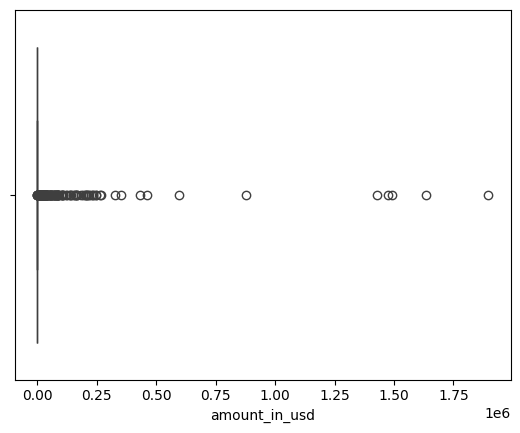

In [ ]:
sns.boxplot(x=df['amount_in_usd'])
plt.show()

In [ ]:
categorical = []
continuous = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)

In [ ]:
le = LabelEncoder()
# oneHot = OneHotEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])
    # df[col] = oneHot.fit_transform(df[col])

In [ ]:
for col in continuous:
    df[col] = df[col].apply(lambda x: np.log(x))

In [ ]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']

grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,2100,5870.165556,5990,15,0.0
1,2101,928.361250,4483,17,0.0
2,2102,763.718750,2805,14,0.0
3,2103,1707.823571,14,12,0.0
4,2104,20095.585238,13919,19,31931.9
...,...,...,...,...,...
2406,4506,17757.860476,10415,18,0.0
2407,4507,4382.729545,8256,17,0.0
2408,4508,6481.724138,27160,26,0.0
2409,4509,9661.212273,6940,17,0.0


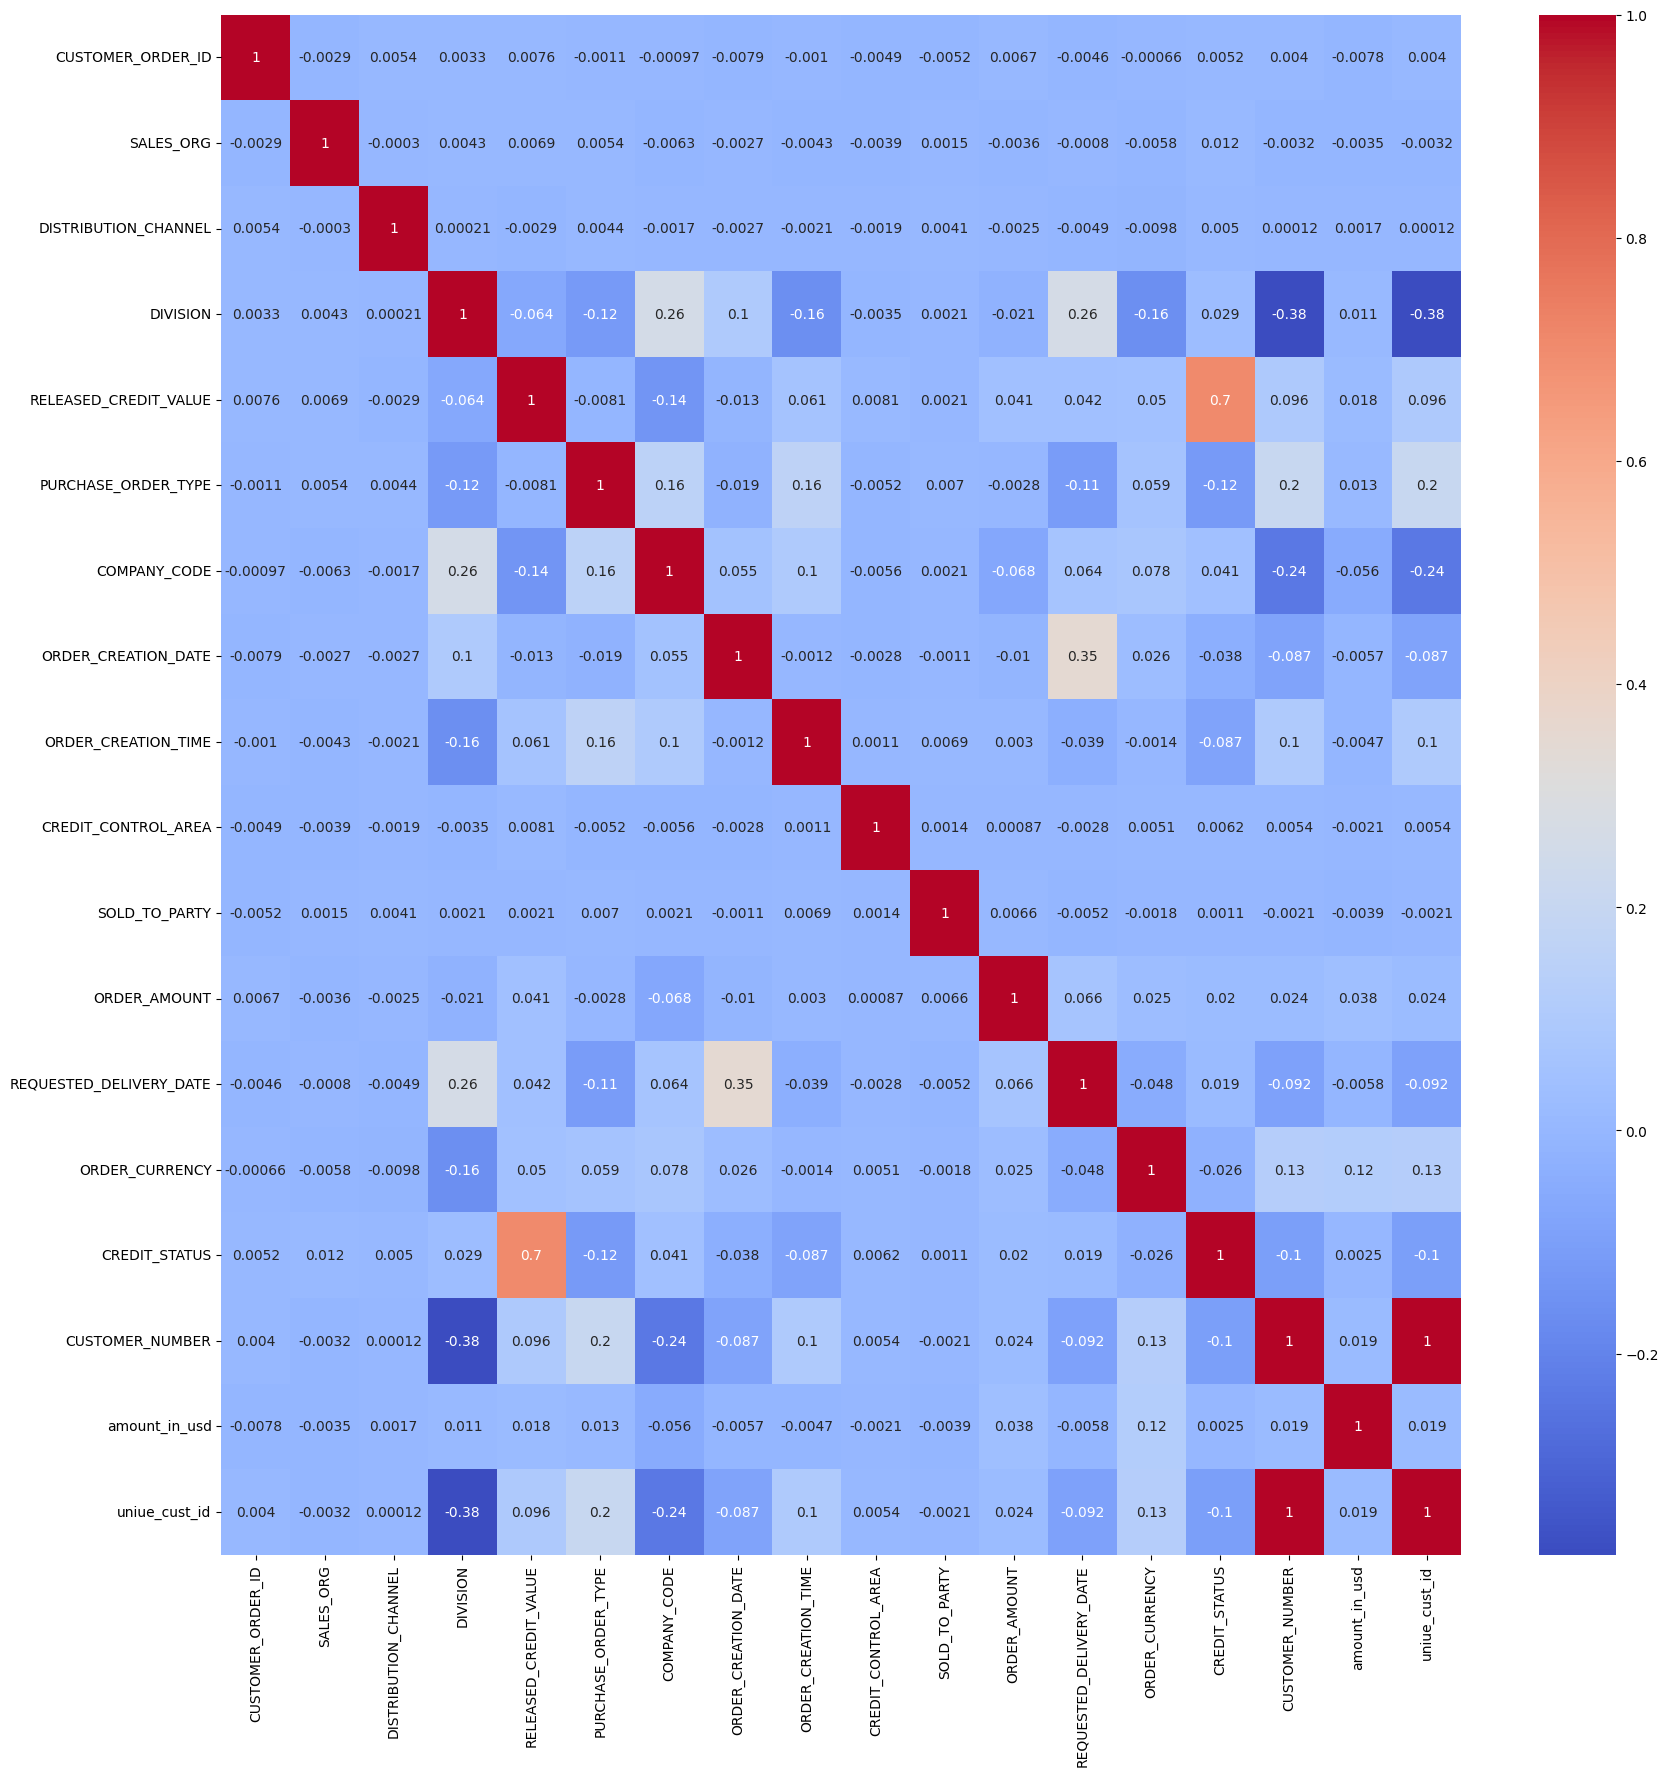

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('CUSTOMER_NUMBER', 'uniue_cust_id')]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [ ]:
datasetTrain = "../data/FinalNew.csv"
df = pd.read_csv(datasetTrain)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43012,SR02,756141537,954.61,1970-01-01 00:00:00.020220113,EUR,NaN,12311807,0.0,12315027
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43114,NR03,798847812,787.36,1970-01-01 00:00:00.020220111,EUR,NaN,12311807,0.0,12315027
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,1970-01-01 00:00:00.020220101,110019,NR01,960984659,67493.46,1970-01-01 00:00:00.020220112,EUR,93.0,12118758,0.0,12122018
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,1970-01-01 00:00:00.020220101,153013,SR02,925857642,1405.54,1970-01-01 00:00:00.020220106,EUR,93.0,1210499770,0.0,1210503060
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,1970-01-01 00:00:00.020220101,160020,SR01,947942786,0.00,1970-01-01 00:00:00.020220106,EUR,64.0,1210351400,0.0,1210354690


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']


In [ ]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
for col in num_cols:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))


In [ ]:
df.rename(columns = {'amount_in_usd': 'target'}, inplace = True)


In [ ]:
df.dropna(inplace = True)

X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)


In [ ]:
regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        pass

regressor_models.pop(33)
regressor_models.pop(46)

('SVR', SVR())

In [ ]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__} \nTest R2: {r2} \n============================================')
    return model.__class__.__name__, model, mse, rmse, r2

In [ ]:
df_compare = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
best_model = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])

In [ ]:
regressor_models[47:]


[('TransformedTargetRegressor', TransformedTargetRegressor()),
 ('TweedieRegressor', TweedieRegressor())]

In [ ]:
for model in regressor_models[:30]:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_compare = pd.concat([df_compare, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        pass


ARDRegression 
Test R2: 0.02596663811235611 
AdaBoostRegressor 
Test R2: 0.8999898951104341 
BaggingRegressor 
Test R2: 0.9841119946781893 
BayesianRidge 
Test R2: 0.02653781122804766 
DecisionTreeRegressor 
Test R2: 0.9928555805832698 
DummyRegressor 
Test R2: -0.00012665519487597976 
ElasticNet 
Test R2: 0.00013112205209020455 
ElasticNetCV 
Test R2: 0.021824474571443875 
ExtraTreeRegressor 
Test R2: 0.9830945037833125 
ExtraTreesRegressor 
Test R2: 0.9945854681204565 
GaussianProcessRegressor 
Test R2: -0.0006394844042474368 
GradientBoostingRegressor 
Test R2: 0.9984052419670387 
HistGradientBoostingRegressor 
Test R2: 0.6118461930907021 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor 
Test R2: -0.0016414831198880986 
KNeighborsRegressor 
Test R2: -0.011285695245529581 
KernelRidge 
Test R2: 0.020520970671891736 
Lars 
Test R2: 0.027856697183091472 
LarsCV 
Test R2: 0.025127657292740913 
Lasso 
Test R2: 0.00012876939126871267 
LassoCV 
Test R2: 0.022199829302742002 
LassoLars 
Test R2: 0.00012876939116157615 
LassoLarsCV 
Test R2: 0.026300203903309893 
LassoLarsIC 
Test R2: 0.026934935786881775 
LinearRegression 
Test R2: 0.02722136505147299 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR 
Test R2: 0.010611931848099165 
MLPRegressor 
Test R2: -0.01872135235771344 


In [ ]:
df_compare


,Regressor,Model,MSE,RMSE,R2
0,ARDRegression(),ARDRegression,4.003936,2.000984,0.025967
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,0.411109,0.641178,0.899990
0,(DecisionTreeRegressor(random_state=613897762)...,BaggingRegressor,0.065310,0.255559,0.984112
0,BayesianRidge(),BayesianRidge,4.001588,2.000397,0.026538
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.029368,0.171372,0.992856
0,DummyRegressor(),DummyRegressor,4.111197,2.027609,-0.000127
0,ElasticNet(),ElasticNet,4.110137,2.027347,0.000131
0,ElasticNetCV(),ElasticNetCV,4.020963,2.005234,0.021824
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.069493,0.263615,0.983095
0,"(ExtraTreeRegressor(random_state=2098828875), ...",ExtraTreesRegressor,0.022257,0.149189,0.994585


In [ ]:
df_compare = df_compare.sort_values(by = ['MSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()


,Regressor,Model,MSE,RMSE,R2
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.006556,0.080966,0.998405
0,"(ExtraTreeRegressor(random_state=2098828875), ...",ExtraTreesRegressor,0.022257,0.149189,0.994585
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.029368,0.171372,0.992856
0,(DecisionTreeRegressor(random_state=613897762)...,BaggingRegressor,0.065310,0.255559,0.984112
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.069493,0.263615,0.983095


<ipython-input-66-40a3d8e90842>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model', y = 'MSE', data = df_compare, palette = 'magma')


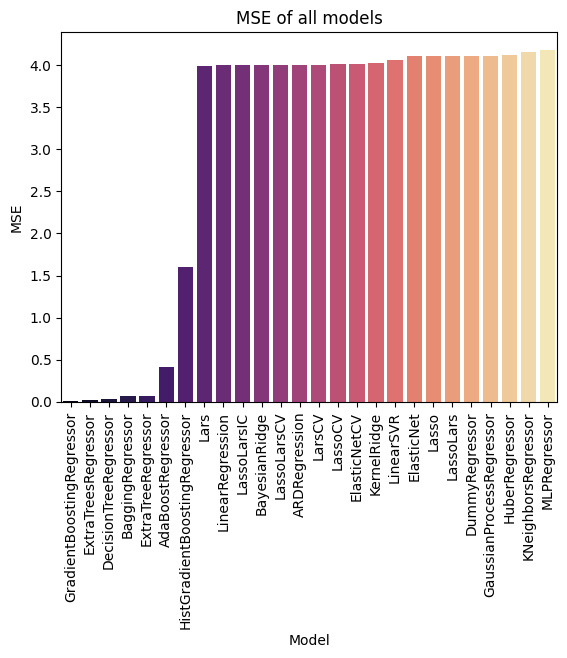

In [ ]:
import seaborn as sns
sns.barplot(x = 'Model', y = 'MSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()


In [ ]:
df_compare = df_compare.sort_values(by = ['RMSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.006556,0.080966,0.998405
0,"(ExtraTreeRegressor(random_state=2098828875), ...",ExtraTreesRegressor,0.022257,0.149189,0.994585
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.029368,0.171372,0.992856
0,(DecisionTreeRegressor(random_state=613897762)...,BaggingRegressor,0.065310,0.255559,0.984112
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.069493,0.263615,0.983095


<ipython-input-68-1fcb356dcc0c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model', y = 'RMSE', data = df_compare, palette = 'magma')


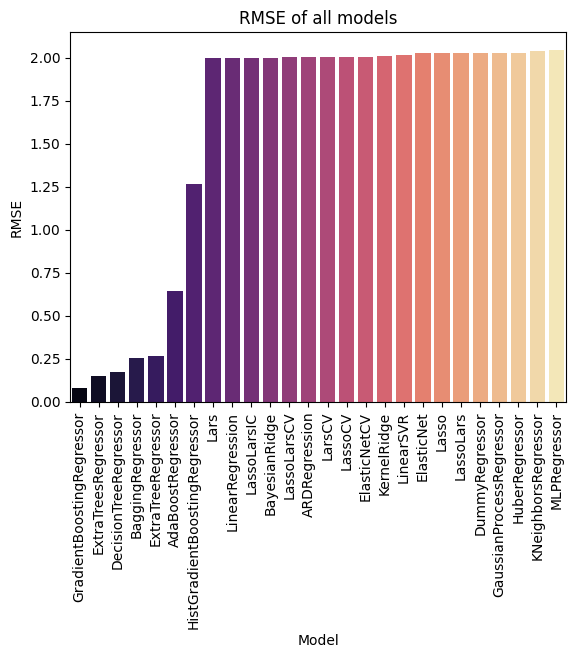

In [ ]:
sns.barplot(x = 'Model', y = 'RMSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

In [ ]:
df_compare = df_compare[df_compare['R2'] > 0]
df_compare = df_compare.sort_values(by = ['R2'], ascending = False)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.006556,0.080966,0.998405
0,"(ExtraTreeRegressor(random_state=2098828875), ...",ExtraTreesRegressor,0.022257,0.149189,0.994585
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.029368,0.171372,0.992856
0,(DecisionTreeRegressor(random_state=613897762)...,BaggingRegressor,0.065310,0.255559,0.984112
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.069493,0.263615,0.983095


<ipython-input-70-ae02a584fb38>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model', y = 'R2', data = df_compare, palette = 'magma')


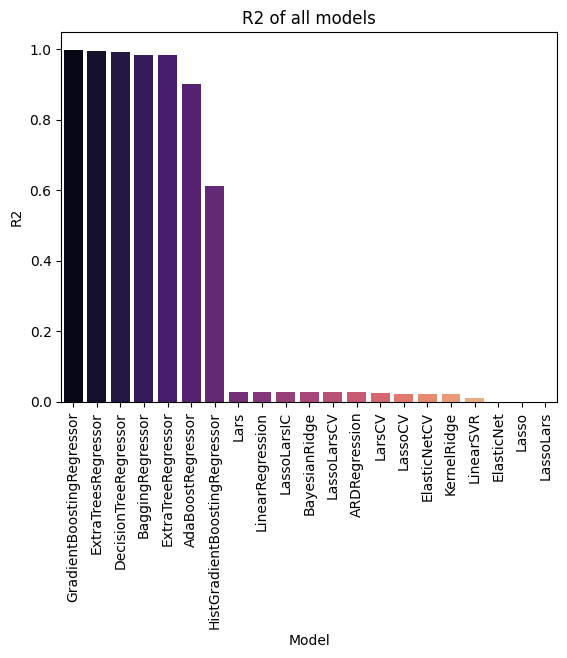

In [ ]:

sns.barplot(x = 'Model', y = 'R2', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

In [ ]:
best_model = best_model.drop_duplicates()
best_model

,Regressor,Model,MSE,RMSE,R2
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.006556,0.080966,0.998405
0,"(ExtraTreeRegressor(random_state=2098828875), ...",ExtraTreesRegressor,0.022257,0.149189,0.994585
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.029368,0.171372,0.992856
0,(DecisionTreeRegressor(random_state=613897762)...,BaggingRegressor,0.065310,0.255559,0.984112
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.069493,0.263615,0.983095


<ipython-input-72-7213f193526a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model', y = 'MSE', data = best_model, palette = 'magma')


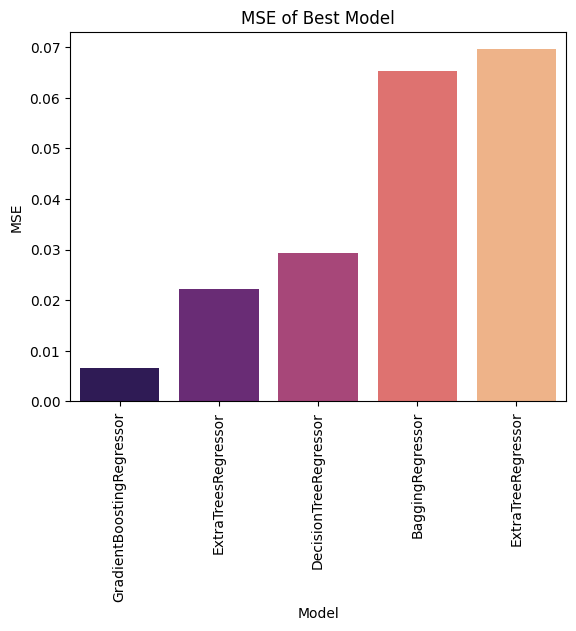

In [ ]:
sns.barplot(x = 'Model', y = 'MSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

<ipython-input-73-2735437c62aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model', y = 'RMSE', data = best_model, palette = 'magma')


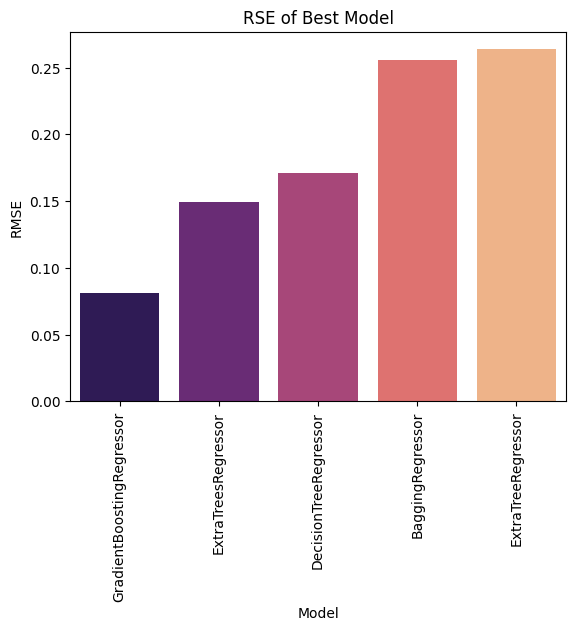

In [ ]:
sns.barplot(x = 'Model', y = 'RMSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

<ipython-input-74-8844754fde00>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model', y = 'R2', data = best_model, palette = 'magma')


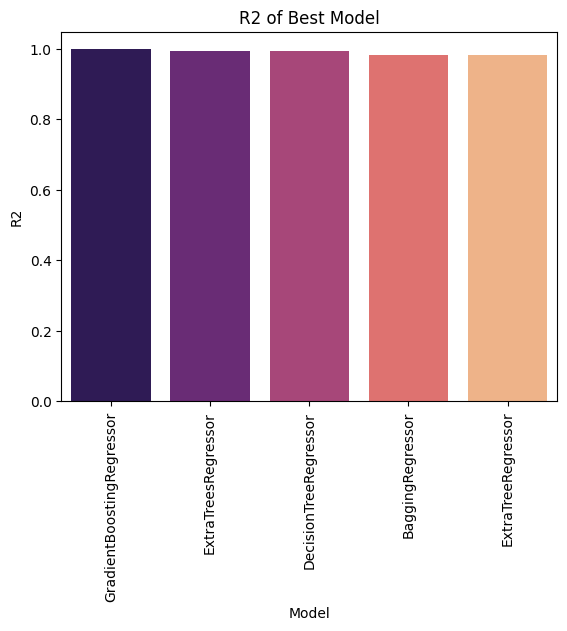

In [ ]:
sns.barplot(x = 'Model', y = 'R2', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

In [ ]:
bestModel = set()

best_model = best_model.sort_values(by = ['MSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['RMSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['R2'], ascending = False)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

In [ ]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator = model, param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    return grid_search.best_estimator_, mse, rmse, r2

In [ ]:
for model in bestModel:
    try:
        print(model)
        hyperparam(model, X_train, y_train, X_test, y_test)
    except:
        print('Error')

GradientBoostingRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 60}
0.9844200170235426
GradientBoostingRegressor(n_estimators=60)
MSE:  0.01913822163068855
RMSE:  0.13834096150702638
R2:  0.9953442642785335
ExtraTreesRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 20}
0.8101913285285802
ExtraTreesRegressor(n_estimators=20)
MSE:  0.19625157283102465
RMSE:  0.4430029038629709
R2:  0.9522580793735685
DecisionTreeRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Error


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Reshape

In [ ]:
import tensorflow.keras.backend as K

def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 17))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', r2])

model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)


Epoch 1/10
400/400 [==============================] - 6s 7ms/step - loss: 22.5043 - mse: 22.5043 - r2: -5598287872.0000 - val_loss: 0.0971 - val_mse: 0.0971 - val_r2: -2780475.7500
Epoch 2/10
400/400 [==============================] - 2s 4ms/step - loss: 3.5655 - mse: 3.5655 - r2: -214734704.0000 - val_loss: 0.0916 - val_mse: 0.0916 - val_r2: -1208583.6250
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 3.1068 - mse: 3.1068 - r2: -102385816.0000 - val_loss: 0.0886 - val_mse: 0.0886 - val_r2: -691490.9375
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 2.8478 - mse: 2.8478 - r2: -41904056.0000 - val_loss: 0.0868 - val_mse: 0.0868 - val_r2: -316320.0312
Epoch 5/10
400/400 [==============================] - 2s 4ms/step - loss: 2.7760 - mse: 2.7760 - r2: -24416780.0000 - val_loss: 0.0846 - val_mse: 0.0846 - val_r2: -79767.4453
Epoch 6/10
400/400 [==============================] - 2s 4ms/step - loss: 2.7625 - mse: 2.7625 - r2: -21508904.00

In [ ]:
# Deep learning is giving negative R^2 value. So this ML model is not suitable for this no of orders prediction case. The best is found to be Gradient Boosting Regressor which is giving a very good R^2 , MSE and MAE values which are GradientBoostingRegressor(n_estimators=60)
MSE:  0.01913822163068855
RMSE:  0.13834096150702638
R2:  0.9953442642785335